In [1]:
using LinearAlgebra, Statistics
using Distributions, Plots, QuadGK, Polynomials, Interpolations
using Base: show_supertypes
using StatsPlots
gr(fmt = :png);

In [2]:
# custom type
struct MyType
    a::Float64
end

myval = MyType(2.0)
@show myval
@show typeof(myval)
@show supertype(typeof(myval))
@show typeof(myval) <: Any;

myval = MyType(2.0)
typeof(myval) = MyType
supertype(typeof(myval)) = Any
typeof(myval) <: Any = true


In [3]:
myval = MyType(2.0)
show(myval)

MyType(2.0)

In [4]:
import Base.show 


function show(io::IO, x::MyType)
    str = "(MyType.a = $(x.a))"  # custom display
    print(io, str)
end
show(myval)  # it creates an IO value first and then calls the above show



(MyType.a = 2.0)

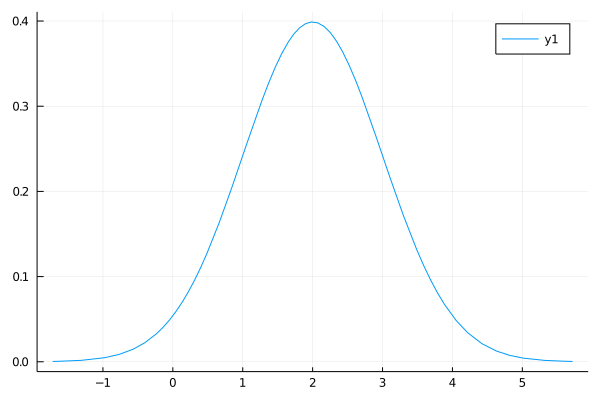

In [5]:
# Distributions

using StatsPlots
d = Normal(2.0, 1.0)
plot(d) # note no other arguments!


Normal{Float64} <: Distribution{Univariate,Continuous} <: Sampleable{Univariate,Continuous} <: Anyshow_supertypes(typeof(d1)) = nothing


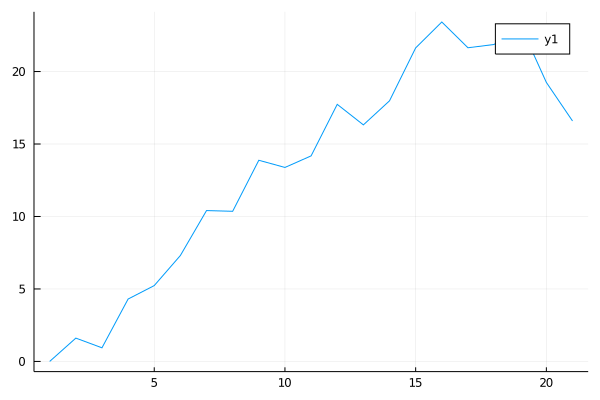

In [6]:
using Distributions

d1 = Normal(1.0,2.0)
@show show_supertypes(typeof(d1))

function simulateprocess(x0; a = 1.0, b = 1.0, N = 5, d::Sampleable{Univariate,Continuous})
    x = zeros(typeof(x0),N+1)
    x[1] = x0
    for t in 2:N+1
        x[t] = a * x[t-1] + b * rand(d)
    end
    return x
end

x0 = 0.0
x = simulateprocess(x0; a = 0.95, b = 1, N = 20, d = d1 )
plot(x)

(minimum(d), maximum(d)) = (0, 2.0)
support(d) = RealInterval(0.0, 2.0)
OurTruncatedExponential <: Distribution{Univariate,Continuous} <: Sampleable{Univariate,Continuous} <: Anyshow_supertypes(typeof(d)) = nothing


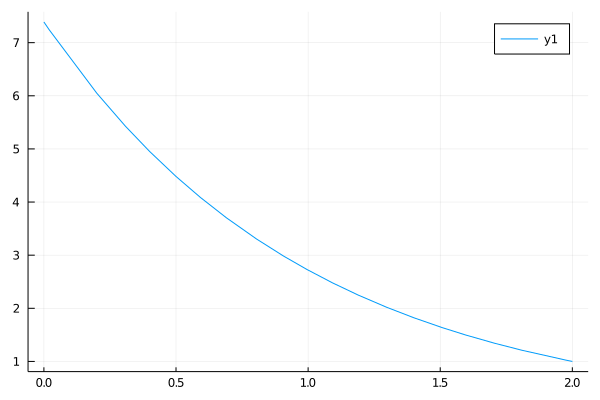

In [11]:
# Create new distribution type

struct OurTruncatedExponential <: Distribution{Univariate,Continuous}
    α::Float64
    xmax::Float64
end
Distributions.pdf(d::OurTruncatedExponential, x) = d.α *exp(-d.α * x)/exp(-d.α * d.xmax)
Distributions.minimum(d::OurTruncatedExponential) = 0
Distributions.maximum(d::OurTruncatedExponential) = d.xmax

d = OurTruncatedExponential(1.0,2.0)
@show minimum(d), maximum(d)
@show support(d) # why does this work?
@show show_supertypes(typeof(d))
plot(d)

typeof(d) = Truncated{Exponential{Float64},Continuous,Float64}


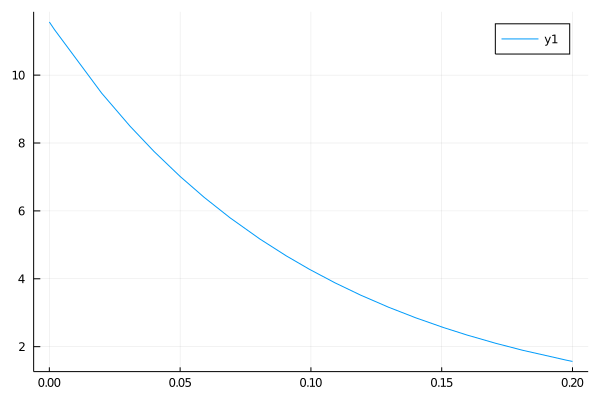

In [13]:
# built-in version

d = Truncated(Exponential(0.1),0.0,0.2)
@show typeof(d)
plot(d)

In [16]:
a = 4.0
b = 3.0 + 1.0im
@show typeof(a)
@show typeof(b) <: Number
@show a + b
@show a * b
@show -b
@show a - b
@show zero(b)
@show one(b);

typeof(a) = Float64
typeof(b) <: Number = true
a + b = 7.0 + 1.0im
a * b = 12.0 + 4.0im
-b = -3.0 - 1.0im
a - b = 1.0 - 1.0im
zero(b) = 0.0 + 0.0im
one(b) = 1.0 + 0.0im


In [18]:
# complex numbers are stored in two parts
x = 4.0 + 1.0im
xbig = BigFloat(4.0) + 1.0im
@show (typeof(x), typeof(xbig))

(typeof(x), typeof(xbig)) = (Complex{Float64}, Complex{BigFloat})


(Complex{Float64}, Complex{BigFloat})

In [20]:
@which +(x,x)

+(z::Complex, w::Complex) in Base at complex.jl:275

In [21]:
@which abs(x)

abs(z::Complex) in Base at complex.jl:264

In [23]:
# Rational numbers have ordering, multiplicative inverse, as do reals.

a = 1 // 10
b = 4 // 6
@show typeof(a)
@show typeof(a) <: Number
@show typeof(a) <: Real
@show inv(a)
@show a / b
@show a < b;

# complex numbers don't have ordering
x = 4.0 + 1.0im
y = 3.0 + 2.1im
# @show x < y; # fails as ordering is not defined on complex numbers

typeof(a) = Rational{Int64}
typeof(a) <: Number = true
typeof(a) <: Real = true
inv(a) = 10//1
a / b = 3//20
a < b = true


LoadError: MethodError: no method matching isless(::Complex{Float64}, ::Complex{Float64})
Closest candidates are:
  isless(!Matched::Missing, ::Any) at missing.jl:87
  isless(!Matched::DataValues.DataValue{Union{}}, ::Any) at /Users/Shane/.julia/packages/DataValues/N7oeL/src/scalar/core.jl:293
  isless(!Matched::Intervals.Endpoint{T,Intervals.Direction{:Right}(),B} where B<:Intervals.Bound where T, ::Any) at /Users/Shane/.julia/packages/Intervals/ua9cq/src/endpoint.jl:161
  ...

In [27]:
# Machine precision for epsilons
@show eps(Float64)
@eps(BigFloat)

eps(Float64) = 2.220446049250313e-16


1.727233711018888925077270372560079914223200072887256277004740694033718360632485e-77

In [29]:
# Julia chooses the most specialised types - Julia promotes integer types to reals to perform isless()
@show @which isless(1,2)
#verses
@show @which isless(1.0,2.0);

#= In[29]:2 =# @which(isless(1, 2)) = isless(x::Real, y::Real) in Base at operators.jl:355
#= In[29]:4 =# @which(isless(1.0, 2.0)) = isless(x::Float64, y::Float64) in Base at float.jl:465


typeof(x) = StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}


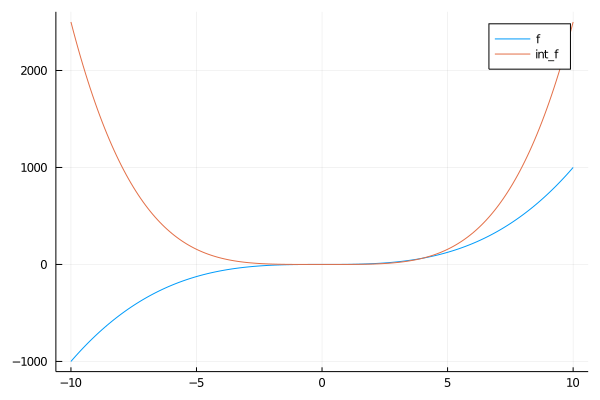

In [81]:
# Functions and Function-like Types
using QuadGK
integral, err = quadgk(x -> x^2,0,1,rtol=1e-8)

function plotfunctions(f,x::StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}})
    intf(y) = quadgk(f, 0.0, y)[1]  # int_0^x f(x) dx

    f_x = f.(x)
    plot(x, f_x, label="f")
    plot!(x, intf.(x), label="int_f")
end


x = range(-10.0,10.0,length=210)
@show typeof(x)
f(x) = x^3

plotfunctions(f,x)



p = Polynomial(2 - 5*x + 2*x^2)
p(1.0) = -1.0


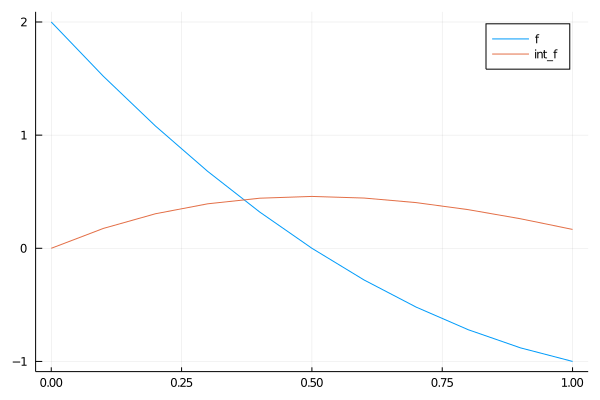

In [82]:
using Polynomials
p = Polynomial([2, -5, 2], :x)  # :x just gives a symbol for display
@show p
@show p(1.0) # call like a function

plotfunctions(p)  # same generic function

f_int(1.0) = 1.0


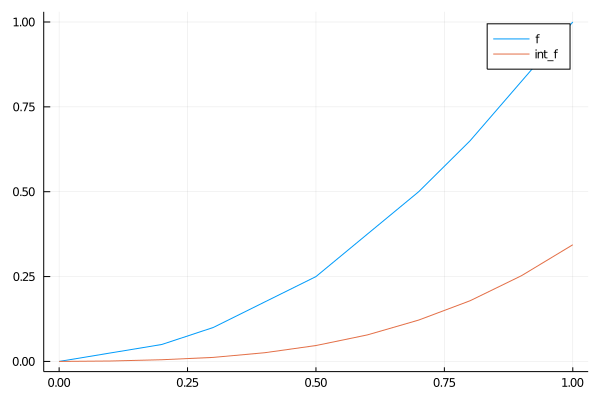

In [87]:
using Interpolations
x = 0.0:0.25:1.0
f(x) = x^2
f_int = LinearInterpolation(x, f.(x))  # interpolates the coarse grid
@show f_int(1.0)  # call like a function

plotfunctions(f_int)  # same generic function

In [134]:
# Exercise 1a
using LinearAlgebra


function trap_weights(x)
    return step(x) * [0.5; ones(length(x) - 2); 0.5]
end
x = range(0.0, 1.0, length = 10)
ω = trap_weights(x)
f(x) = x^2
dot(f.(x), ω)

0.3353909465020576

In [182]:
struct UniformTrapezoidal
    count::Int
    Δ::Float64 
end

Base.iterate(S::UniformTrapezoidal, state=1) = state > S.count ? nothing : (if state == 1 || state == count; Δ*0.5 else Δ*1.0 end, state+1)

function integration(f, x::AbstractArray; count = 10) 
    Δ = step(x)
    int = similar(x)
    for (i,value) in enumerate(UniformTrapezoidal(count,Δ))
        int[i] = f(x[i]) * value
    end
    return sum(int)
end

count = 100
x = range(0.0, 1.0, length = count)
@show Δ = step(x)
f(x) = x^2

integral = integration(f,x,count = count)   

Δ = step(x) = 0.010101010101010102


0.33335033840084344

In [175]:
struct Squares
    count::Int
end

Base.iterate(S::Squares, state=1) = state > S.count ? nothing : (state*state, state+1)

for i in Squares(7)
    println(i)
end

1
4
9
16
25
36
49


In [3]:
struct SquaresVector <: AbstractArray{Int, 1}
    count::Int
end
Base.size(S::SquaresVector) = (S.count,)
Base.IndexStyle(::Type{<:SquaresVector}) = IndexLinear()
Base.getindex(S::SquaresVector, i::Int) = i*i

s = SquaresVector(4)
s[2]

4

In [23]:
# Exercise 1b

struct TrapezoidalVector <: AbstractArray{Int, 1}
    count::Int
end
Base.size(S::TrapezoidalVector) = (S.count,)
Base.IndexStyle(::Type{<:TrapezoidalVector}) = IndexLinear()
Base.getindex(S::TrapezoidalVector, i::Int) = 1
Base.setindex!(S::TrapezoidalVector, v, 2) = 2


V = TrapezoidalVector(4)


LoadError: syntax: "2" is not a valid function argument name around In[23]:9

In [27]:
?setindex!()

```
setindex!(collection, value, key...)
```

Store the given value at the given key or index within a collection. The syntax `a[i,j,...] = x` is converted by the compiler to `(setindex!(a, x, i, j, ...); x)`.

---

```
setindex!(A, X, inds...)
A[inds...] = X
```

Store values from array `X` within some subset of `A` as specified by `inds`. The syntax `A[inds...] = X` is equivalent to `setindex!(A, X, inds...)`.

# Examples

```jldoctest
julia> A = zeros(2,2);

julia> setindex!(A, [10, 20], [1, 2]);

julia> A[[3, 4]] = [30, 40];

julia> A
2×2 Array{Float64,2}:
 10.0  30.0
 20.0  40.0
```


In [28]:
?getindex

search: getindex



```
getindex(type[, elements...])
```

Construct a 1-d array of the specified type. This is usually called with the syntax `Type[]`. Element values can be specified using `Type[a,b,c,...]`.

# Examples

```jldoctest
julia> Int8[1, 2, 3]
3-element Array{Int8,1}:
 1
 2
 3

julia> getindex(Int8, 1, 2, 3)
3-element Array{Int8,1}:
 1
 2
 3
```

---

```
getindex(collection, key...)
```

Retrieve the value(s) stored at the given key or index within a collection. The syntax `a[i,j,...]` is converted by the compiler to `getindex(a, i, j, ...)`.

# Examples

```jldoctest
julia> A = Dict("a" => 1, "b" => 2)
Dict{String,Int64} with 2 entries:
  "b" => 2
  "a" => 1

julia> getindex(A, "a")
1
```

---

```
getindex(A, inds...)
```

Return a subset of array `A` as specified by `inds`, where each `ind` may be an `Int`, an [`AbstractRange`](@ref), or a [`Vector`](@ref). See the manual section on [array indexing](@ref man-array-indexing) for details.

# Examples

```jldoctest
julia> A = [1 2; 3 4]
2×2 Array{Int64,2}:
 1  2
 3  4

julia> getindex(A, 1)
1

julia> getindex(A, [2, 1])
2-element Array{Int64,1}:
 3
 1

julia> getindex(A, 2:4)
3-element Array{Int64,1}:
 3
 2
 4
```

---

```
getindex(tree::GitTree, target::AbstractString) -> GitObject
```

Look up `target` path in the `tree`, returning a [`GitObject`](@ref) (a [`GitBlob`](@ref) in the case of a file, or another [`GitTree`](@ref) if looking up a directory).

# Examples

```julia
tree = LibGit2.GitTree(repo, "HEAD^{tree}")
readme = tree["README.md"]
subtree = tree["test"]
runtests = subtree["runtests.jl"]
```
